In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Model evaluation and selection between k-NN and Gaussian Naive Baye's**

In [ ]:
# importing library
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df=pd.read_csv(f'/content/drive/MyDrive/ML DATASETS/BRFSS22CleanedSelected.csv')

In [ ]:
target_counts = df['DiabetesBinary'].value_counts()

# Display the count of each target class
print(target_counts)

0    216154
1     37637
Name: DiabetesBinary, dtype: int64


In [ ]:

# Separate features and target variable
X = df.drop('DiabetesBinary', axis=1)
y = df['DiabetesBinary']

**Train,validation and Test split**

In [ ]:
# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**Handling Imbalanced Data**

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
dfResampled= pd.concat([y_train_resampled,X_train_resampled], axis=1)

In [ ]:
target_counts = dfResampled['DiabetesBinary'].value_counts()

# Display the count of each target class
print(target_counts)

0    129842
1    129842
Name: DiabetesBinary, dtype: int64


In [ ]:
dfResampled.describe()

,DiabetesBinary,BMI,Stroke,HeartDiseaseorAttack,RoutineCheckupSpan,GenHlth,PhysHlth,DiffWalk,Age,Income
count,259684.000000,259684.000000,259684.000000,259684.000000,259684.000000,259684.000000,259684.000000,259684.000000,259684.000000,259684.000000
mean,0.500000,30.157857,0.039190,0.106614,1.233284,2.792925,5.836428,0.199381,8.230180,6.466228
std,0.500001,7.051771,0.194047,0.308623,0.655321,1.027880,9.906481,0.399536,3.240354,2.450459
min,0.000000,12.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,25.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,6.000000,5.000000
50%,0.500000,29.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,9.000000,7.000000
75%,1.000000,34.000000,0.000000,0.000000,1.000000,3.000000,6.000000,0.000000,11.000000,8.000000
max,1.000000,98.000000,1.000000,1.000000,4.000000,5.000000,30.000000,1.000000,13.000000,11.000000


**Feature Scaling**

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



**Adding feature names to scaled datas**

In [ ]:
feature_names = ["BMI",	"Stroke",	"HeartDiseaseorAttack","RoutineCheckupSpan","GenHlth","PhysHlth","DiffWalk","Age","Income"]
X_train_scaled=pd.DataFrame(X_train_scaled, columns=feature_names)
X_val_scaled=pd.DataFrame(X_val_scaled, columns=feature_names)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=feature_names)

In [ ]:
X_train_scaled.describe()

,BMI,Stroke,HeartDiseaseorAttack,RoutineCheckupSpan,GenHlth,PhysHlth,DiffWalk,Age,Income
count,2.596840e+05,2.596840e+05,2.596840e+05,2.596840e+05,2.596840e+05,2.596840e+05,2.596840e+05,2.596840e+05,259684.000000
mean,-1.427193e-16,-3.546092e-17,-4.881349e-17,5.341028e-17,-1.164519e-16,-1.313367e-17,-1.882493e-17,2.127655e-16,0.000000
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002
min,-2.574941e+00,-2.019615e-01,-3.454522e-01,-3.559844e-01,-1.744298e+00,-5.891536e-01,-4.990323e-01,-2.231298e+00,-2.230700
25%,-7.314286e-01,-2.019615e-01,-3.454522e-01,-3.559844e-01,-7.714196e-01,-5.891536e-01,-4.990323e-01,-6.882533e-01,-0.598350
50%,-1.641941e-01,-2.019615e-01,-3.454522e-01,-3.559844e-01,2.014585e-01,-5.891536e-01,-4.990323e-01,2.375734e-01,0.217826
75%,5.448490e-01,-2.019615e-01,-3.454522e-01,-3.559844e-01,2.014585e-01,1.651163e-02,-4.990323e-01,8.547912e-01,0.625913
max,9.620601e+00,4.951440e+00,2.894756e+00,4.221934e+00,2.147215e+00,2.439173e+00,2.003878e+00,1.472009e+00,1.850176


# **Model Comparison**

**Model Evaluation with cross validation and without scaled testing inputs i.e. unscaled validation and testing sets**

In [ ]:
#  Model Evaluation with Hyperparameter Tuning and Cross-Validation
grid_models = [
    (KNeighborsClassifier(), [{'n_neighbors': [3, 5, 7, 11, 15, 33, 47, 51, 55, 59, 63, 69, 99, 123]}]),
    (GaussianNB(), [{'var_smoothing': [1e-04, 1e-06, 1e-09, 1e-11, 1e-13, 1e-15, 1e-17, 1e-19, 1e-24, 1e-28]}])
]

best_models = []
for model, param_grid in grid_models:
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train_resampled)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Cross-validate the model on the validation set
    val_scores = cross_val_score(best_model, X_val, y_val, cv=5)
    val_accuracy = np.mean(val_scores)

    best_models.append((best_model, best_params, val_accuracy))

# Select the best model based on cross-validated validation accuracy
best_model = max(best_models, key=lambda x: x[2])
final_model, best_params, val_accuracy = best_model

# Evaluate the final model on the test set
y_test_pred1 = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred1)

# Print results
print(f"Best Model: {final_model.__class__.__name__}")
print(f"Best Parameters: {best_params}")
print(f"Cross-Validated Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate a classification report on the test set
report = classification_report(y_test, y_test_pred1)
print("Classification Report:")
print(report)

Best Model: KNeighborsClassifier
Best Parameters: {'n_neighbors': 33}
Cross-Validated Validation Accuracy: 0.85
Test Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76     43147
           1       0.18      0.42      0.26      7612

    accuracy                           0.63     50759
   macro avg       0.53      0.55      0.51     50759
weighted avg       0.77      0.63      0.68     50759



**Model Evaluation with cross validation and with scaled testing inputs i.e. scaled validation and testing sets**

In [ ]:
#  Model Evaluation with Hyperparameter Tuning and Cross-Validation
grid_models = [
    (KNeighborsClassifier(), [{'n_neighbors': [3, 5, 7, 11, 15, 33, 47, 51, 55, 59, 63, 69, 99, 123]}]),
    (GaussianNB(), [{'var_smoothing': [1e-04, 1e-06, 1e-09, 1e-11, 1e-13, 1e-15, 1e-17, 1e-19, 1e-24, 1e-28]}])
]

best_models = []
for model, param_grid in grid_models:
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train_resampled)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Cross-validate the model on the validation set
    val_scores = cross_val_score(best_model, X_val_scaled, y_val, cv=5)
    val_accuracy = np.mean(val_scores)

    best_models.append((best_model, best_params, val_accuracy))

# Select the best model based on cross-validated validation accuracy
best_model = max(best_models, key=lambda x: x[2])
final_model, best_params, val_accuracy = best_model

# Evaluate the final model on the test set
y_test_pred2 = final_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred2)

# Print results
print(f"Best Model: {final_model.__class__.__name__}")
print(f"Best Parameters: {best_params}")
print(f"Cross-Validated Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate a classification report on the test set
report = classification_report(y_test, y_test_pred2)
print("Classification Report:")
print(report)

Best Model: KNeighborsClassifier
Best Parameters: {'n_neighbors': 33}
Cross-Validated Validation Accuracy: 0.85
Test Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80     43147
           1       0.29      0.70      0.41      7612

    accuracy                           0.70     50759
   macro avg       0.61      0.70      0.60     50759
weighted avg       0.83      0.70      0.74     50759



**Hence, we concluded that k-NN with k value=   and with scaled input values performs better than others**

**VISUALIZING**

In [ ]:


dFy_test_pred1=pd.DataFrame(y_test_pred1,columns=['DiabetesPediction'])
df1=pd.concat([X_test_scaled,dFy_test_pred1,y_test], axis=1)

In [ ]:
dFy_test_pred2=pd.DataFrame(y_test_pred2,columns=['DiabetesPrediction'])
df2=pd.concat([X_test_scaled,dFy_test_pred2,y_test], axis=1)

In [ ]:
df1.describe()

,BMI,Stroke,HeartDiseaseorAttack,RoutineCheckupSpan,GenHlth,PhysHlth,DiffWalk,Age,Income,DiabetesPediction,DiabetesBinary
count,50759.000000,50759.000000,50759.000000,50759.000000,50759.000000,50759.000000,50759.000000,50759.000000,50759.000000,50759.000000,50759.000000
mean,-0.161269,0.027083,-0.027617,0.222610,-0.191131,-0.116461,-0.089515,-0.235569,0.146152,0.345377,0.149964
std,0.956779,1.062035,0.963769,1.241007,1.012913,0.892557,0.925903,1.079393,0.988622,0.475496,0.357039
min,-2.574941,-0.201961,-0.345452,-0.355984,-1.744298,-0.589154,-0.499032,-2.231298,-2.230700,0.000000,0.000000
25%,-0.873237,-0.201961,-0.345452,-0.355984,-0.771420,-0.589154,-0.499032,-0.996862,-0.598350,0.000000,0.000000
50%,-0.306003,-0.201961,-0.345452,-0.355984,0.201458,-0.589154,-0.499032,-0.071036,0.217826,0.000000,0.000000
75%,0.261232,-0.201961,-0.345452,-0.355984,0.201458,-0.084433,-0.499032,0.546182,1.034001,1.000000,0.000000
max,9.478792,4.951440,2.894756,4.221934,2.147215,2.439173,2.003878,1.472009,1.850176,1.000000,1.000000


In [ ]:
df2.describe()

,BMI,Stroke,HeartDiseaseorAttack,RoutineCheckupSpan,GenHlth,PhysHlth,DiffWalk,Age,Income,DiabetesPrediction,DiabetesBinary
count,50759.000000,50759.000000,50759.000000,50759.000000,50759.000000,50759.000000,50759.000000,50759.000000,50759.000000,50759.000000,50759.000000
mean,-0.161269,0.027083,-0.027617,0.222610,-0.191131,-0.116461,-0.089515,-0.235569,0.146152,0.362005,0.149964
std,0.956779,1.062035,0.963769,1.241007,1.012913,0.892557,0.925903,1.079393,0.988622,0.480585,0.357039
min,-2.574941,-0.201961,-0.345452,-0.355984,-1.744298,-0.589154,-0.499032,-2.231298,-2.230700,0.000000,0.000000
25%,-0.873237,-0.201961,-0.345452,-0.355984,-0.771420,-0.589154,-0.499032,-0.996862,-0.598350,0.000000,0.000000
50%,-0.306003,-0.201961,-0.345452,-0.355984,0.201458,-0.589154,-0.499032,-0.071036,0.217826,0.000000,0.000000
75%,0.261232,-0.201961,-0.345452,-0.355984,0.201458,-0.084433,-0.499032,0.546182,1.034001,1.000000,0.000000
max,9.478792,4.951440,2.894756,4.221934,2.147215,2.439173,2.003878,1.472009,1.850176,1.000000,1.000000


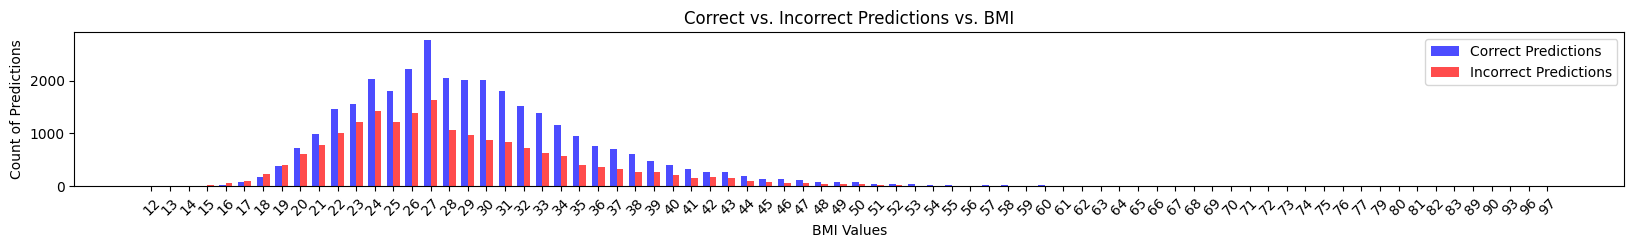

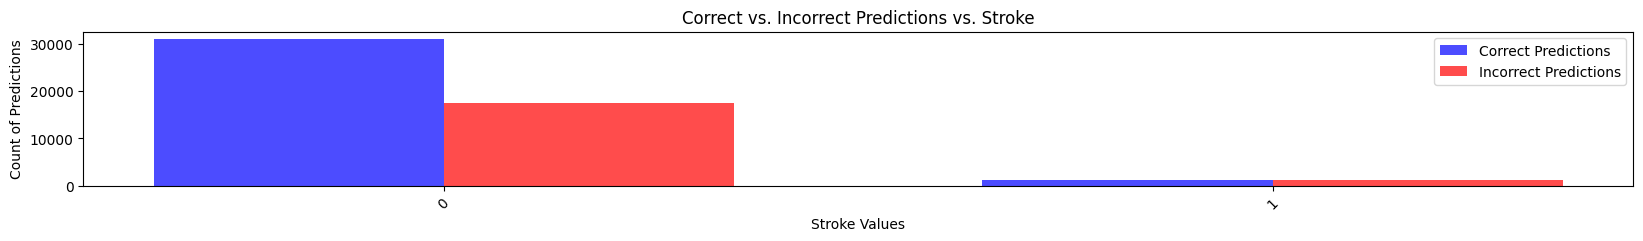

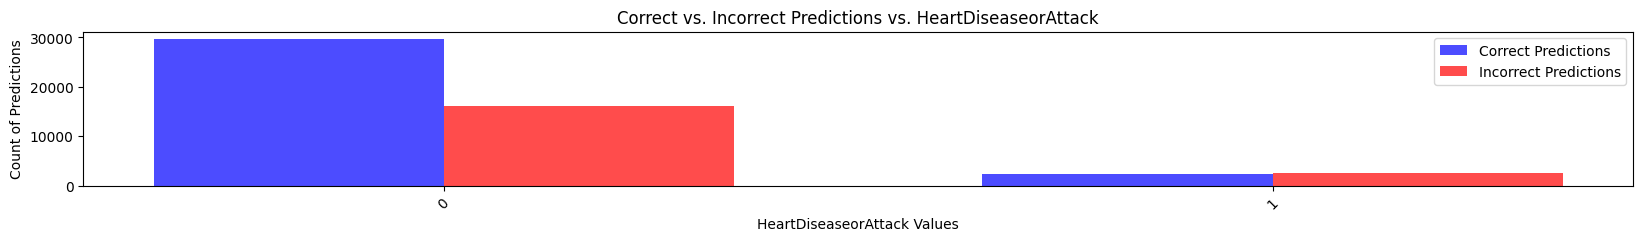

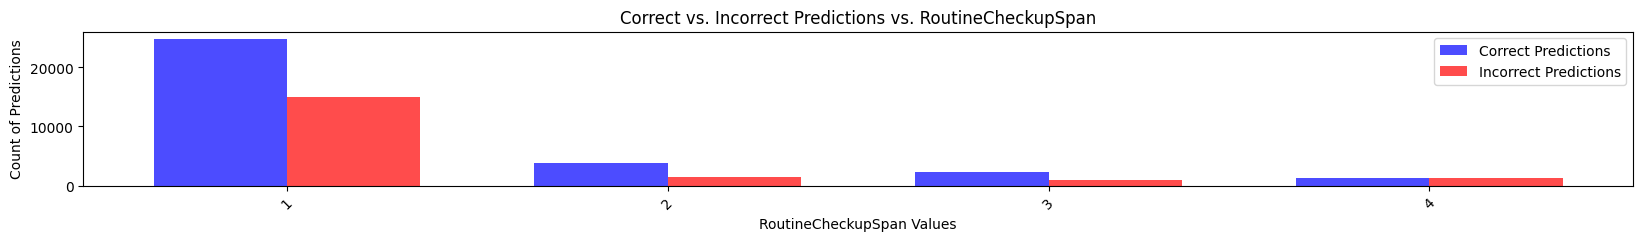

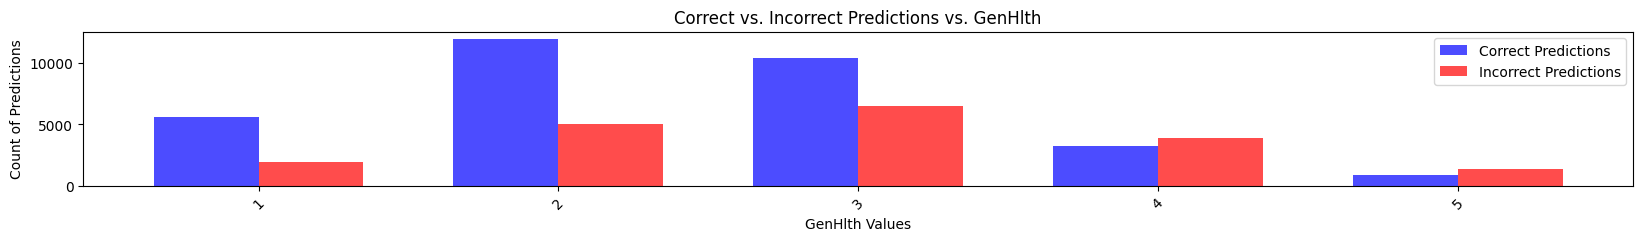

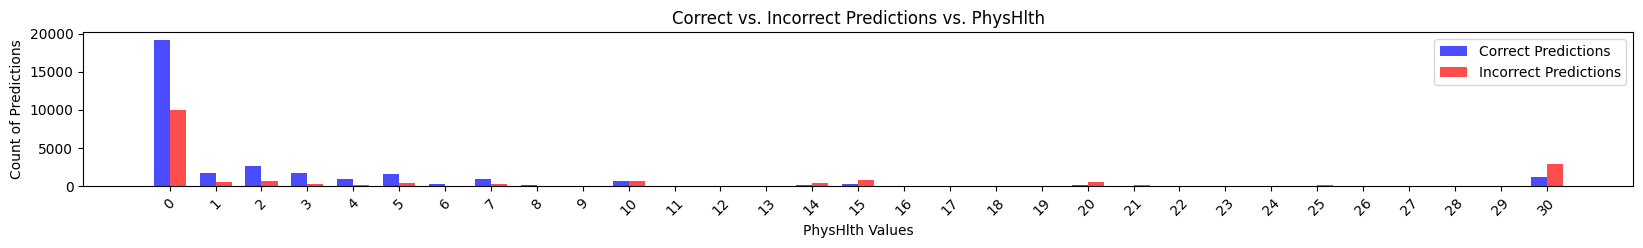

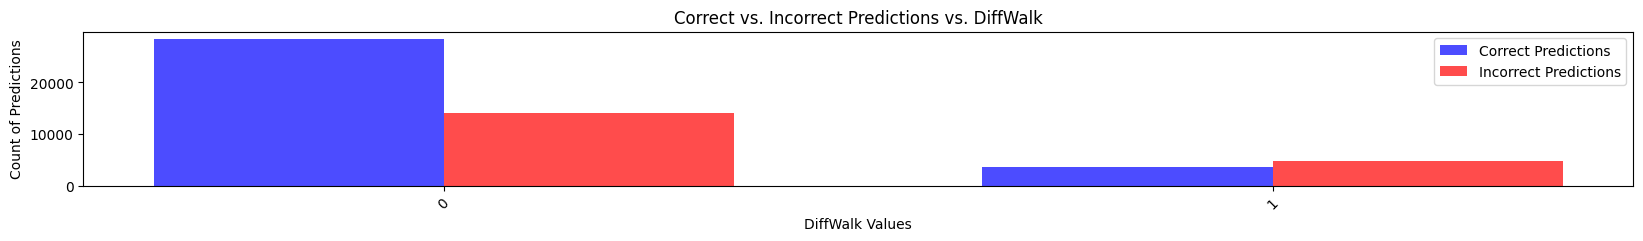

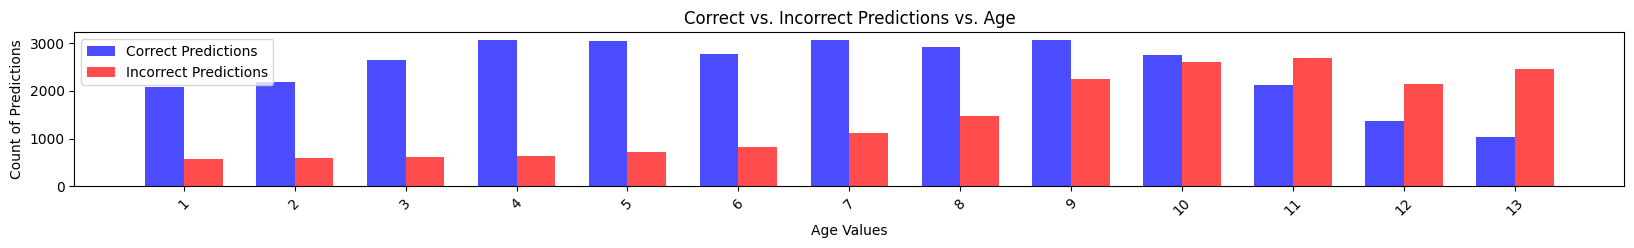

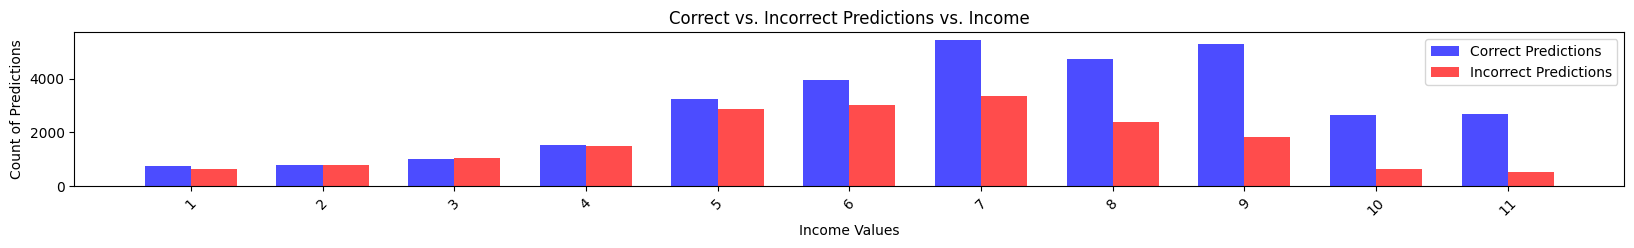

In [ ]:
# List of feature names
features_of_interest = ['BMI', 'Stroke', 'HeartDiseaseorAttack', 'RoutineCheckupSpan', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']

# Loop over each feature
for feature_name in features_of_interest:
    feature_values = X_test[feature_name]

    correct_predictions = (y_test_pred1 == y_test)
    incorrect_predictions = (y_test_pred1 != y_test)

    # Calculate the count of correct and incorrect predictions for each unique feature value
    unique_values_correct, correct_counts = np.unique(feature_values[correct_predictions], return_counts=True)
    unique_values_incorrect, incorrect_counts = np.unique(feature_values[incorrect_predictions], return_counts=True)

    # Ensure that the unique feature values are consistent for both correct and incorrect predictions
    all_values = np.union1d(unique_values_correct, unique_values_incorrect)

    # Create a bar graph with two bars for each feature value
    bar_width = 0.35
    index = np.arange(len(all_values))

    # Fill in counts for missing feature values in correct and incorrect predictions
    correct_counts = [correct_counts[unique_values_correct == val][0] if val in unique_values_correct else 0 for val in all_values]
    incorrect_counts = [incorrect_counts[unique_values_incorrect == val][0] if val in unique_values_incorrect else 0 for val in all_values]


   # Increase the size of the x-axis
    plt.figure(figsize=(20, 2))  # Adjust the figure size as needed

    plt.bar(index, correct_counts, bar_width, label='Correct Predictions', color='b', alpha=0.7)
    plt.bar(index + bar_width, incorrect_counts, bar_width, label='Incorrect Predictions', color='r', alpha=0.7)

    plt.xlabel(f'{feature_name} Values')
    plt.ylabel('Count of Predictions')
    plt.title(f'Correct vs. Incorrect Predictions vs. {feature_name}')
    plt.xticks(index + bar_width / 2, all_values, rotation=45)
    plt.legend()
    plt.show()

**Hence, we concluded that some particular values of features have equal or greater  error than correct prediction**

**FEATURES------------------------------------->VALUES**

1.   BMI -----------------------------------------------> 15 to 19
2.   Stroke --------------------------------------------> 1
3.   HeartDiseaseorAttack-------------------> 1
4.   RoutineCheckupSpan--------------------> 4
5.   GenHlth------------------------------------------> 4 and 5
6.   PhysHlth----------------------------------------> 10,14,15,20,30
7.   DiffWalk-----------------------------------------> 1
8.   Age-------------------------------------------------> 10 to 13
9.   Income-------------------------------------------> 1 to 4